### 08 그래프 만들기
## 08-1 파이썬으로 만들 수 있는 그래프 살펴 보기

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

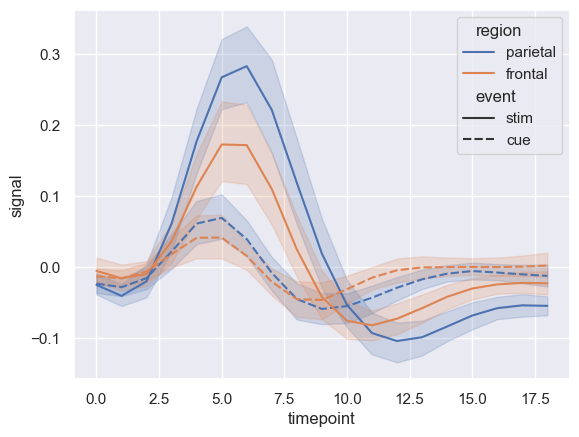

In [1]:
import seaborn as sns
sns.set_theme(style='darkgrid')

# Load an example daraset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
            hue="region", style="event",
            data=fmri)

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
.get_level_values("network")
.astype(int)
.isin(used_networks))
df = df.loc[:, used_columns]
df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
data=corr_mat,
x="level_0", y="level_1", hue="correlation", size="correlation",
palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
label.set_rotation(90)
for artist in g.legend.legendHandles:
artist.set_edgecolor(".7")

IndentationError: expected an indented block (1502205361.py, line 30)

## Lab1: 산점도 - 변수 간 관계 표현하기
- 나이와 따른 소득처럼 연속된 값으로 된 두 변수의 관계를 표현할 때 사용

In [3]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='displ', ylabel='hwy'>

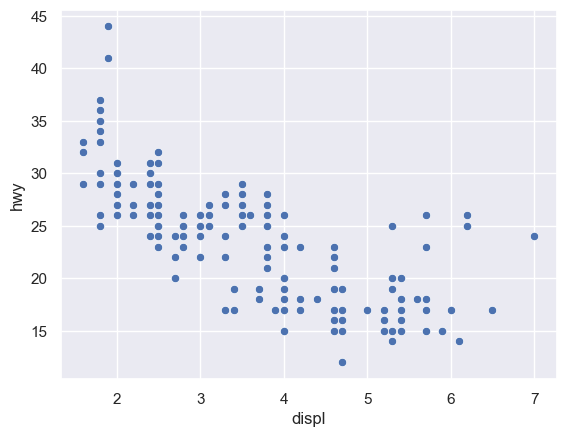

In [5]:
# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시
# 배기량(disp) 변수를 x축에, 고속도로 연비(hwy) 변수를 y축에 놓고 산점도 생성
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0), (10.0, 30.0)]

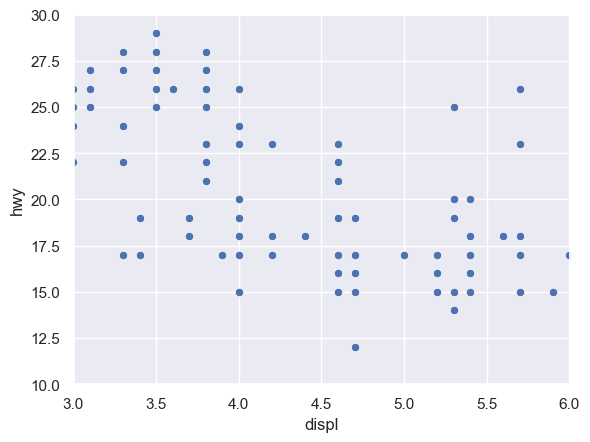

In [6]:
# x축 범위 설정
# x축의 번위를 3~6으로 제한
sns.scatterplot(data=mpg, x='displ', y='hwy')\
    .set(xlim = (3,6), ylim=(10,30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

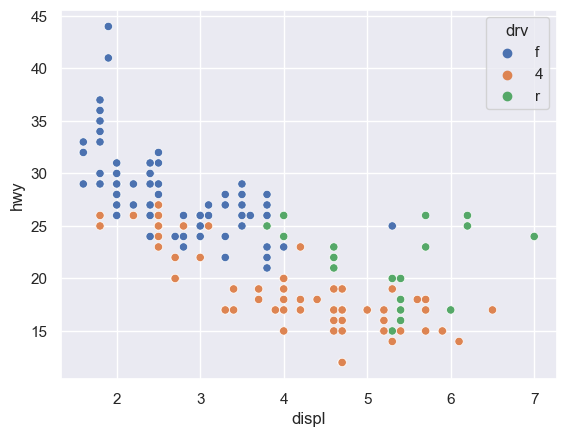

In [8]:
# hue를 이용하면 marker의 색깔을 종류별로 다르게 표현 가능
# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시
# 구동방식(drv)에 따라 marker의 색깔을 다르게 표시
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

> 고속도로 연비 비교?
    > 1. 배기량이 큰 차는 고속도로 연비가 낮다.
    
> 고속도로 연비 비교?
    > 1. 전륜구동(f) 자동차는 고속도로 연비가 높다.
    > 2. 후륜구동(r) 자동차는 고속도로 연비가 낮다.
    
> 고속도로 연비 비교?
    > 1. 전륜구동(f) 자동차이기 때문에 고속도로 연비가 높다.
    > 2. 후륜구동(r) 자동차이기 때문에 고속도로 연비가 낮다.
    
> 고속도로 연비 비교?
    > 1. 전륜구동(f) 자동차는 대부분 배기량이 4이하이고, 고속도로 연비가 높다.
    > 2. 후륜구동(r) 자동차는 대부분 배기량이 4이상이고, 고속도로 연비가 낮다.

## Lab 2 : 혼자서 해보기
- mpg와 midwest 데이터를 이용하여 데이터 분석

### Q1: mpg 데이터에서 도시연비(cty)와 고속도로 연비(hwy) 사이의 관게를 알아보려고 함
- x축은 cty, y축은 hwy로 된 산점도를 표시하시오
- 서로 양의 상관관계가 있음을 추정할 수 있음

<AxesSubplot:xlabel='cty', ylabel='hwy'>

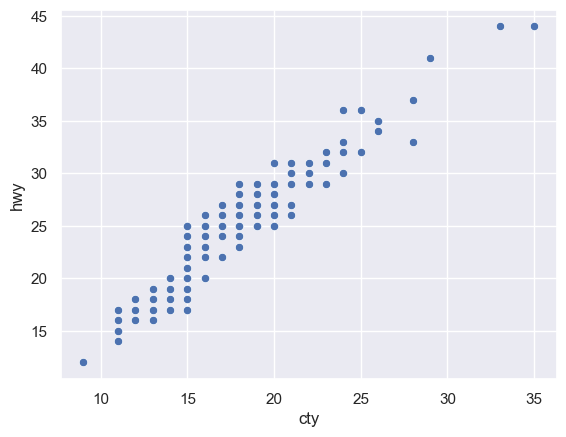

In [9]:
sns.scatterplot(data=mpg, x='cty', y='hwy')

<AxesSubplot:xlabel='cty', ylabel='hwy'>

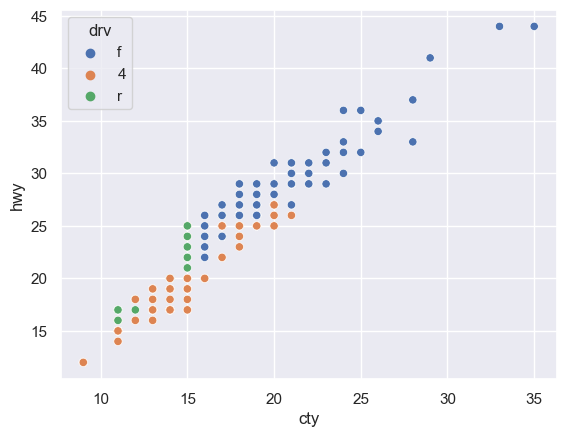

In [11]:
sns.scatterplot(data=mpg, x='cty', y='hwy', hue='drv')

### Q2: 미국 지역별 인구 정보 데이터 midwest.csv를 이용하여 분석한다
- x축은 지역별 전체 인구(poptotal)
- y축은 아시아계 인구(popasian)
- 전체 인구는 50만명 이하, 아시아 인구는 1만명 이하 지역만 산점도에 표시함

In [12]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

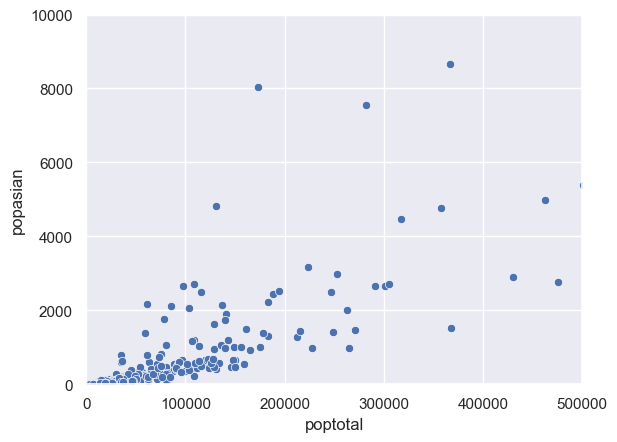

In [14]:
sns.scatterplot(data=midwest, x='poptotal', y='popasian')\
    .set(xlim=(0,500000), ylim=(0,10000))

## 08-3 막대 그래프 - 집단 간 차이 표현하기
- 성별 소득 차이처럼 집단 간 차이를 표시할 때 사용

## Lab3: 평균 막대 그래프 만들기
### 1. 집단별 평균표 만들기
- 구동방식(drv)별 고속도로 연비 평균 비교 그래프 만들기

In [15]:
mpg = pd.read_csv('mpg.csv')

In [16]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
# 구동방식(drv)별로 고속도로 연비(hwy) 평균 구하기
# 그룹에 사용하는 컬럼(변수)가 기본적으로 인덱스가 된다.
# 컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

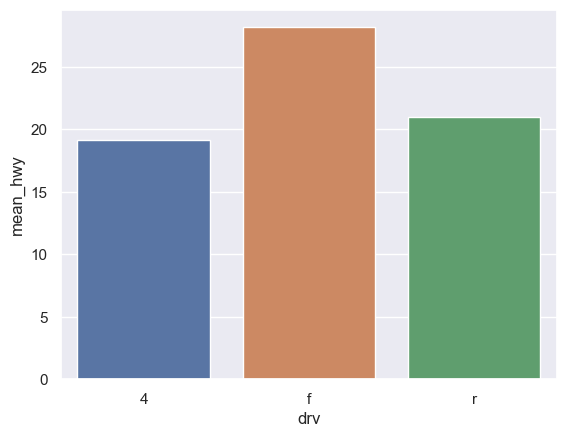

In [20]:
# 구동박식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [21]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [22]:
# 평균 연비 크기 순으로 내림차 정력
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

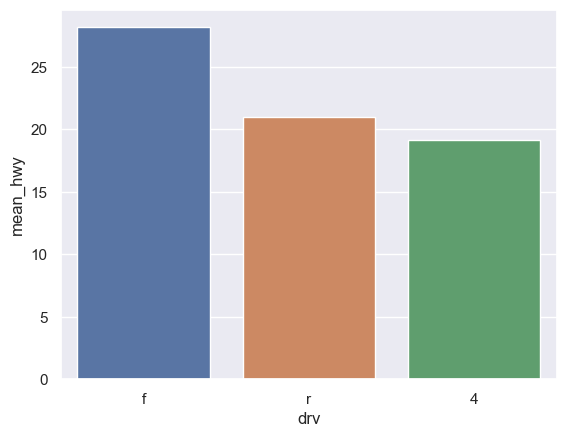

In [23]:
# 구동방식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

## Lab4: 빈도 막대 그래프 만들기
### 1. 집단별 빈도표 만들기
- mpg 데이터에서 구동방식(drv)별 빈도표를 만들기

In [24]:
# 구동방식(drv)별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv=('drv', 'count'))
df_mpg

,drv,count_drv
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='count_drv'>

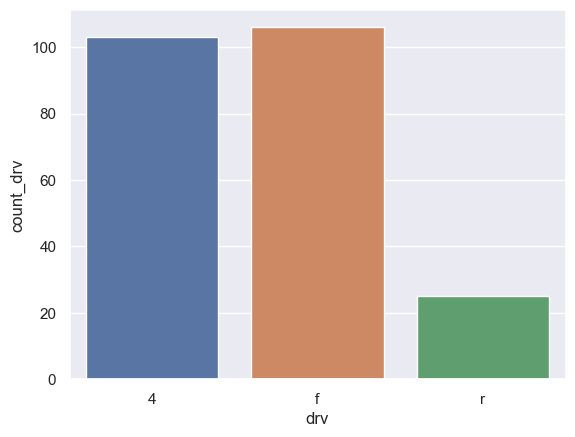

In [25]:
# 구동방식(drv)별 막대 그래프 만들기
sns.barplot(data=df_mpg, x='drv', y='count_drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

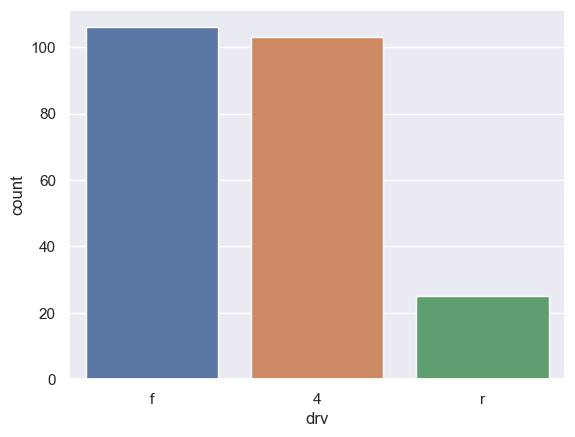

In [26]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

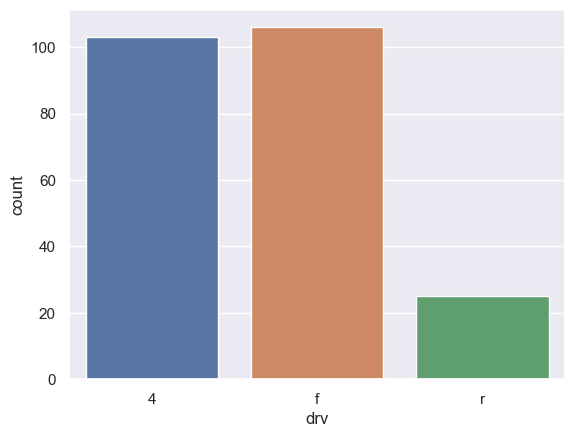

In [27]:
#sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
# 표시 순서는 ['4','f', 'r']순서
sns.countplot(data=mpg, x='drv', order=['4', 'f', 'r'])

<AxesSubplot:xlabel='drv', ylabel='count'>

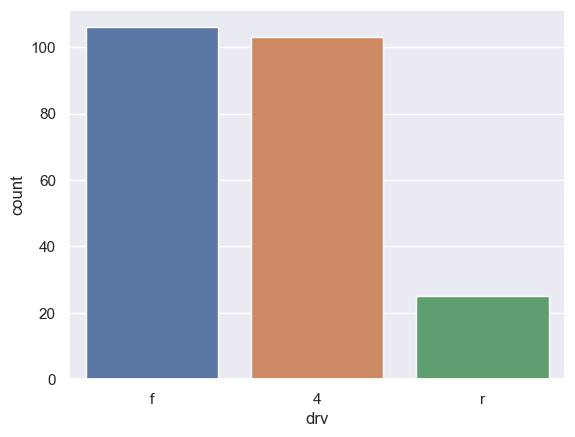

In [28]:
#sns.countplot()으로 구동상식에 따른 빈도 막대 그래프 그리기
# 표시 순서는 빈도 수가 큰 순서
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().index)

## Lab5:혼자 해보기(mpg 데이터 분석)
### Q1:'suv' 차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기

In [29]:
mpg = pd.read_csv('mpg.csv')

In [30]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [31]:
# suv 차량만 추출
mpg.query('category=="suv"').head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [38]:
# suv 파량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty=('cty', 'mean'))

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


In [40]:
# suv 파량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 출력
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty=('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False)

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000
2,ford,12.888889
0,chevrolet,12.666667
1,dodge,11.857143
4,land rover,11.500000
5,lincoln,11.333333


In [41]:
# suv 차량만 추출
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시연비 평균이 높은 회사 순으로 상위 5개 출력
df = mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty=('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False).head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

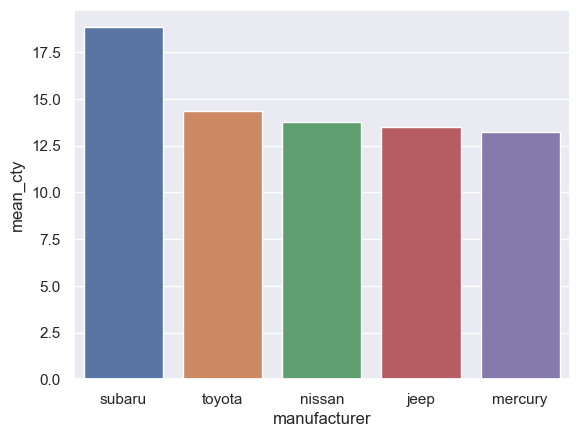

In [42]:
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시연비 평균이 높은 회사 순으로 상위 5개 막대 그래프 출력
sns.barplot(data=df, x='manufacturer', y='mean_cty')

### Q2: 자동차 중 어떤 category의 차가 많은지 알아보려고 함
- sns.barplot을 이용하면 자동차 종류별 빈도를 표현한 그래프를 그리시오
- 막대를 빈도가 높은 순으로 정렬하시오

In [47]:
# 자동차 category별 자동차 수 테이블 만들고, 내림차순 정렬한 데이블을 생성
# 데이터 프레임 df에 저장
df = mpg.groupby('category', as_index=False)\
    .agg(n = ('category', 'count'))\
    .sort_values('n', ascending=False)

<AxesSubplot:xlabel='category', ylabel='n'>

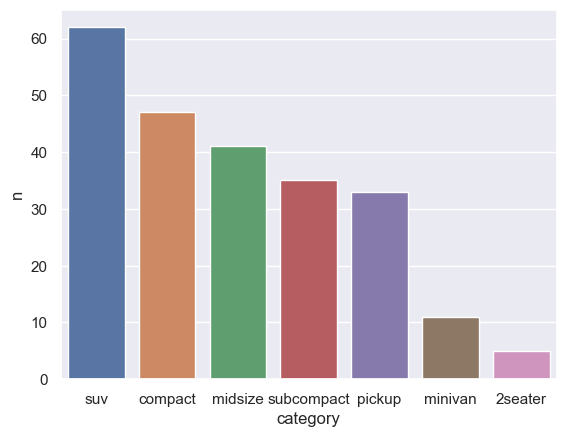

In [49]:
# sns.barplot()을 이용하여 자동차 종류별 빈도를 표현한 그래프 그리기
sns.barplot(data=df, x='category', y='n')

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기
- 선 그래프는 데이터를 선으로 표현한 그래프로, 시간에 따라 달라지는 데이터를 표현할 때 자주 사용함

## Lab6: 시계열 그래프 만들기 - economics 데이터 분석
- economics: 미국의 여러 경제 지표를 월별로 나타낸 그래프
- 시간에 따라 실업자 수가 어떻게 변하는지 시계열 그래프를 만들어보자

In [50]:
# economics 데이터 불러오기
import pandas as pd
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [51]:
# economics 데이터의 변수 유형 및 Null 건수 알아보기
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


<AxesSubplot:xlabel='date', ylabel='unemploy'>

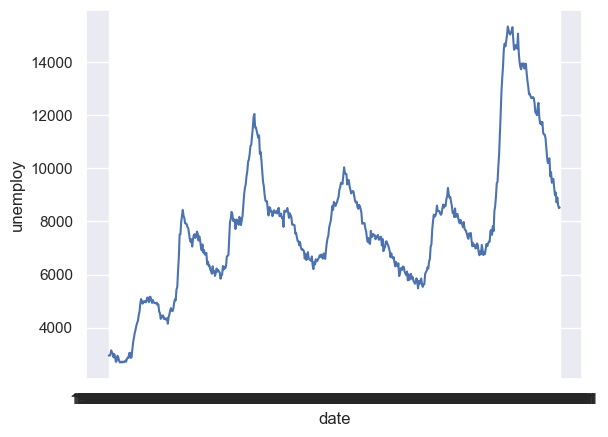

In [52]:
# lineplot()을 이용하여 선 그래프 작성
# x축 data에 여러 날ㅉ가 겹쳐 출력됨
import seaborn as sns
sns.lineplot(data=economics, x='date', y='unemploy')

In [53]:
# 변수 date의 유형을 date 타입으로 변경하여 date2 생성
economics['date2'] = pd.to_datetime(economics['date'])

In [54]:
# economics 데이터의 변수 유형 및 Null 건수 알아보기
# 변수 date, date2 유형 비교
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


- 변수의 타입을 날짜 시간 타입으로 변경하여도 값이 달라지지 않음
- 날짜 시간 타입 데이터는 df.dt를 이용하여 연, 월, 일을 추출할 수 있음

In [56]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [57]:
# 연, 월, 일 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [58]:
# 연, 월, 일 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [59]:
# 연, 월, 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

- 연도 변수 만들기

In [61]:
# 연도 변수 추가하기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


In [62]:
# 월 변수 추가하기
economics['month'] = economics['date2'].dt.month
economics.head(20)

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11
5,1967-12-01,525.1,199657.0,11.8,4.8,3018,1967-12-01,1967,12
6,1968-01-01,530.9,199808.0,11.7,5.1,2878,1968-01-01,1968,1
7,1968-02-01,533.6,199920.0,12.3,4.5,3001,1968-02-01,1968,2
8,1968-03-01,544.3,200056.0,11.7,4.1,2877,1968-03-01,1968,3
9,1968-04-01,544.0,200208.0,12.3,4.6,2709,1968-04-01,1968,4


- x축에 연도 표기하기

<AxesSubplot:xlabel='year', ylabel='unemploy'>

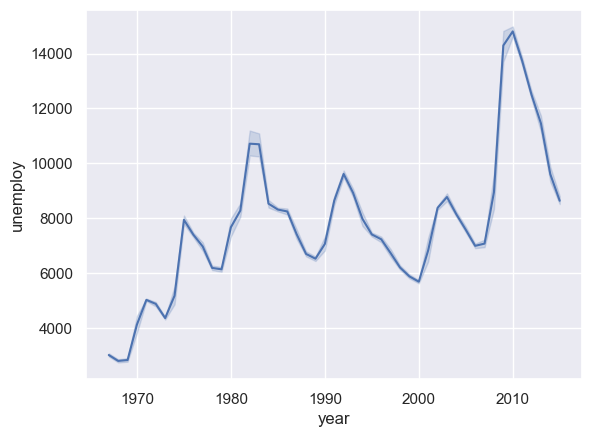

In [63]:
# x축에 연도 표기
sns.lineplot(data=economics, x='year', y='unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

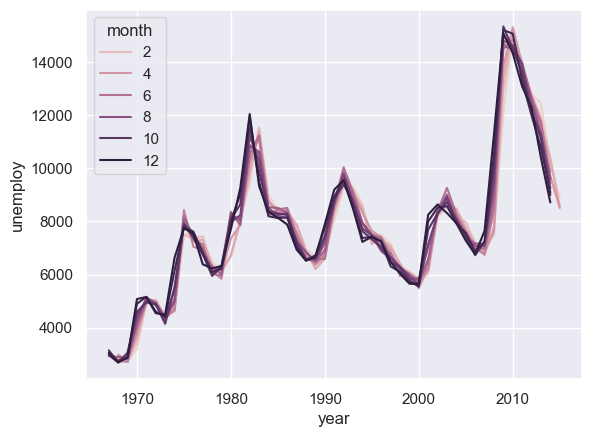

In [64]:
# x축에 연 표기
sns.lineplot(data=economics, x='year', y='unemploy', hue='month')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

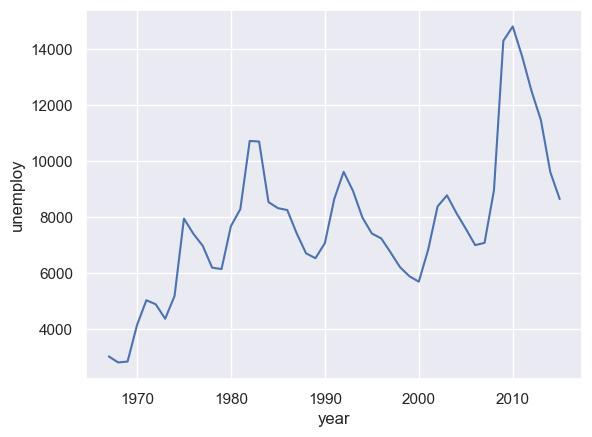

In [65]:
# x축에 연도 표기 (선 위 아래 표시 면적은 신뢰구간)
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)

- (그래프 분석) 실업자 수가 약 5년을 주기로 등락을 반복함
- 2005년부터 급격히 증가했다가 2010년부터 다시 감소 추세

## Lab7: 혼자서 해보기(economics 데이터 분석 그래프 만들기)
- economics 데이터에서 개인저축률(psavert)을 분석해보기

### Q1: psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지, 연도별 개인 저축률의 변화 그래프를 만들어보자

In [66]:
# economics 데이터 불러오기
import pandas as pd
import seaborn as sns
economics = pd.read_csv('economics.csv')

In [67]:
# economics 데이터에서 변수 date의 유형을 datetime으로 변경하여 변수 date2로 저장
economics['date2'] = pd.to_datetime(economics['date'])

In [68]:
# economics 데이터 프레임 변수 date2에서 연도를 추출하여 변수 year로 저장
economics['year'] = economics['date2'].dt.year

In [69]:
# economics 데이터 프레임 데이터 5개 행 출력
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='psavert'>

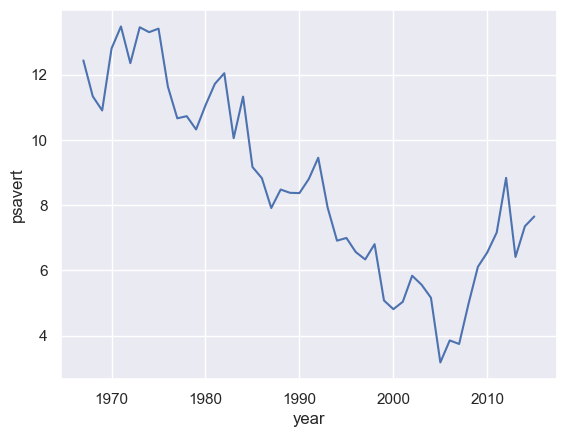

In [70]:
# economics 데이터 프레임에서 연도(year)별 개인저축률(psacert) 선 그래프 그리기
sns.lineplot(data=economics, x='year', y='psavert', ci=None)

- 데이터가 수집된 1970년부터 약 2005년까지 지속적으로 개인 저축률이 감소하다가 2005년부터 다시 증가하기 시작함

### Q2: 2014년 월별 psavert(개인 저축률)의 변화를 시계열 그래프로 그려보세요
- df.query() 사용

In [71]:
# economics 데이터 프레임 변수 date2에서 월을 추출하여 변수 month로 저장
economics['month'] = economics['date2'].dt.month

In [72]:
# economics 데이터 프레임에서 2014년 데이터만 추출하여 데이터 프레임 df_2014에 저장
df_2014 = economics.query('year==2014')

In [73]:
df_2014.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


<AxesSubplot:xlabel='month', ylabel='psavert'>

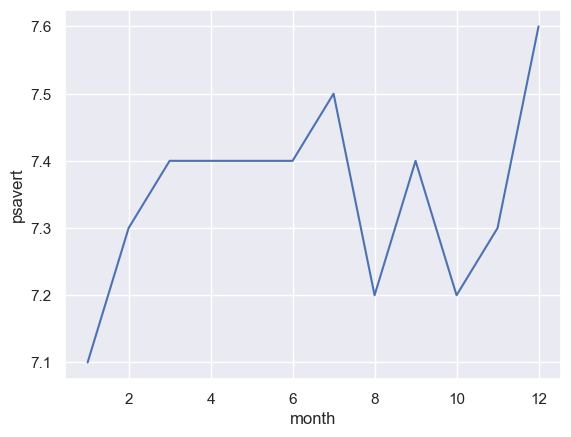

In [75]:
# economics 데이터 프레임에서 2014년 월별 개인저축을 선 그래프 그리기
sns.lineplot(data=df_2014, x='month', y='psavert', ci=None)

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기
- 상자 그림(Box Plot)은 데이터가 퍼져있는 형태를 직사각형 상자 모양으로 표현한 그래프

## Lab 8: 상자 그림 만들기
- mpg 데이터를 이용하여 '구동방식(drv)별 고속도록 연비(hwy)를 표현하기

In [76]:
# mpg 데이터 읽어오기
import pandas as pd
import seaborn as sns
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

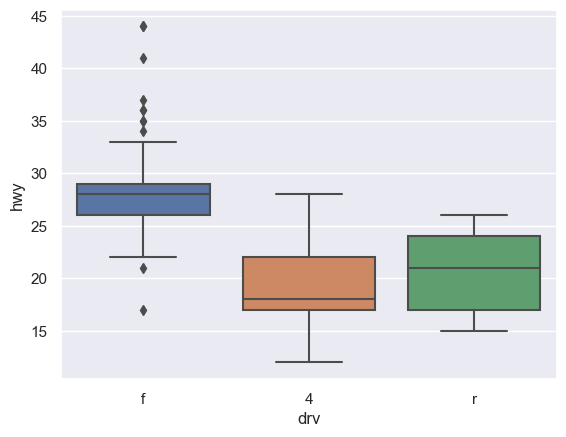

In [77]:
# x축을 구동방식(drv), y축을 고속도로 연비(hwy)로 지정하고,
# 구동방식(drv)별 고속도로 연비(hwy)를 상자그림으로 표현하기
sns.boxplot(data=mpg, x='drv', y='hwy')

- 전류구동(f)은 연비가 평균적으로 높고, 연비가 극단적으로 높거나 낮은 자동차가 존재함
- 4륜 구동(4)은 평균이 다른 구동방식에 비해 낮음
- 후륜구동(r)은 극단치가 없고, 자동차 대부분이 사분위 범위에 포함됨

## Lab 8: 혼자 해보기 - mpg 데이터를 분석해보기
- mpg 데이터를 이용하여 '자동차 종류별 도시 연비'를 비교해 보시오

### Q1: 자동차 종류(category)중 'compact', 'subcompact', 'suv' 차종에 대한 도시 연비 (cty)를 비교해 보시오
- df.query() 사용
- sns.boxplot()

In [78]:
import pandas as pd
import seaborn as sns

In [79]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

In [80]:
# 'compact', 'subcompact', 'suv' 차종 데이터 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category  
honda         civic               1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
chevrolet     c1500 suburban 2wd  5.3    2008  8    auto(l4)    r    14   20   r   suv           2
ford          explorer 4wd        4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         durango 4wd         4.7    2008  8    auto(l5)    4    13   17   r   suv           2
subaru        impreza awd         2.5    2008  4    auto(s4)    4    20   27   r   compact       1
                                                                                                ..
ford          mustang             4.6    1999  8    manual(m5)  r    15   22   r   subcompact    1
                                                    auto(l4)    r    15   21   r   subcompact    1
                                  4.0    2008  6    manual(m5)  r    17   26   r   subcompact    1
               

<AxesSubplot:xlabel='category', ylabel='cty'>

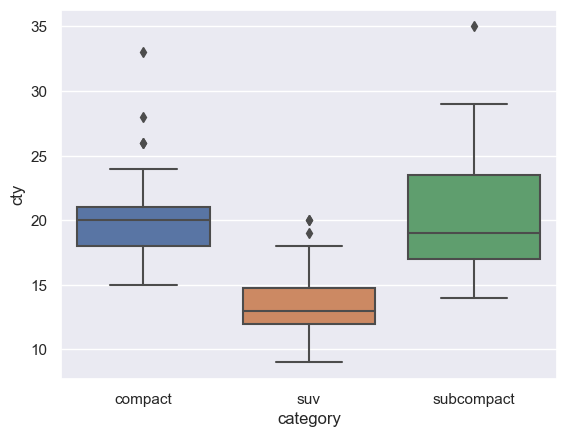

In [81]:
# 상자 그림 만들기
sns.boxplot(data=df, x='category', y='cty')

- suv의 도시 연비가 가장 낮음